In [48]:
import pandas as pd
from collections import defaultdict

#đọc dữ liệu từ file excel
df1 = pd.read_excel('Data_Excel.xlsx')
df1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
1,Ho Chi Minh,0,1160.33,1116.33,124.34,30.5587,597.455,1160.85,1132.38,885.695,...,1094.96,1124.17,253.246,1338.58,612.139,197.377,1284.53,1184.5,10.7638,106.644
2,Ha Noi,1160.33,0,126.386,1235.55,1144.99,656.691,59.4992,88.5321,274.868,...,75.4583,61.9374,1253.72,264.688,632.877,1012.09,258.969,25.1566,21.1382,105.505
3,Hai Phong,1116.33,126.386,0,1201.31,1098.31,575.046,74.8557,38.2124,257.613,...,81.0462,67.7972,1233.5,388.365,552.143,954.685,385.355,131.855,20.8,106.667
4,Can Tho,124.34,1235.55,1201.31,0,154.836,706.318,1240.92,1214.55,961.076,...,1173.59,1203.69,141.402,1397.1,719.139,318.316,1340.06,1260.22,10.0333,105.783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Lai Chau,1338.58,264.688,388.365,1397.1,1327.58,894.008,314.368,350.219,480.001,...,335.35,326.621,1391.71,0,869.9,1212.71,66.2173,256.549,22.3687,103.312
60,Da Nang,612.139,632.877,552.143,719.139,588.201,24.1078,613.17,578.124,394.765,...,558.27,581.334,792.636,869.9,0,426.346,834.263,653.091,16.0544,108.202
61,Dak Nong,197.377,1012.09,954.685,318.316,169.248,409.375,1005.65,974.505,741.846,...,942.608,970.176,428.933,1212.71,426.346,0,1163.82,1035.27,12.2646,107.61
62,Dien Bien,1284.53,258.969,385.355,1340.06,1274.38,858.32,314.829,347.424,440.463,...,321.986,319.479,1331.48,66.2173,834.263,1163.82,0,257.12,21.8042,103.108


In [49]:
lat = {}
long = {}
for i in range(1,len(df1)):
    lat[df1.iloc[i][0]] = df1.iloc[i][64]
    long[df1.iloc[i][0]] = df1.iloc[i][65]

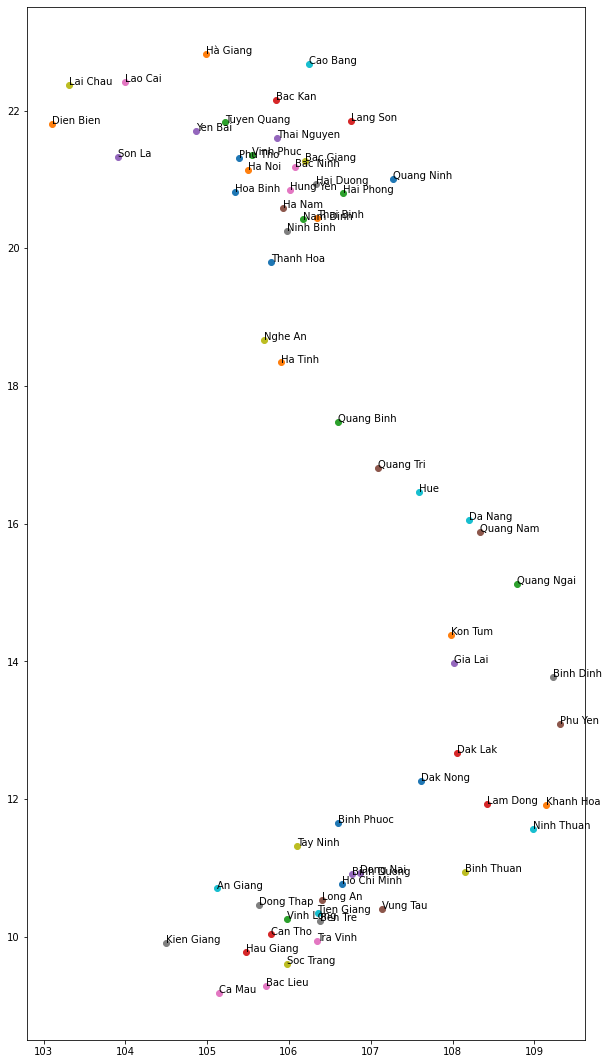

In [50]:
import matplotlib.pyplot as plt
import numpy as np

latitude = df1['Unnamed: 64']
longtitude = df1['Unnamed: 65']
province = df1['Unnamed: 0']
fig,axes = plt.subplots(figsize = (10,19))
for i in range (1,len(latitude)):
    axes.scatter(longtitude[i], latitude[i])
    axes.text(longtitude[i], latitude[i],province[i])

In [51]:
import pandas as pd
from collections import defaultdict
import time
from queue import PriorityQueue

start_time = time.time()

#initial begin warehouse and end warehouse
begin = str(input('begin:'))
end = str(input('end:'))
for i in range(len(df1)):
    if df1.iloc[i][0] == begin:
        begin_id = i
    if df1.iloc[i][0] == end:
        end_id = i
print(begin_id, end_id)

begin:Lang Son
end:Hue
34 10


In [52]:
#latitude df1.iloc[i][64]
#longtitude df1.iloc[i][65]
#tạo bộ dữ liệu để xử lý
data = defaultdict(list) #khởi tạo bộ dữ liệu
over = []
for i in range (1,len(df1)):#duyệt từng thành phố từ trên xuống để tìm thành phố lân cận
    lst = []
    
    # thêm những thành phố lân cận nếu khoảng cách lớn hơn 0, bé hơn a( ở đây a=4)
    for j in range(1,len(df1)):
        if 21.3 < df1.iloc[i][64] < 22.9 and 103.1 < df1.iloc[i][65] < 105.3:
            if 0 < df1.iloc[i][j] < 130:
                lst.append(df1.iloc[0][j])
                lst.append(df1.iloc[i][j])
        elif 21.6< df1.iloc[i][64] <22.7 and 105.83< df1.iloc[i][65] < 106.76:
            if 0 < df1.iloc[i][j] < 120:
                lst.append(df1.iloc[0][j])
                lst.append(df1.iloc[i][j])
        elif 15.8< df1.iloc[i][64] <19.9 and 103< df1.iloc[i][65] < 110:
            if 0 < df1.iloc[i][j] < 130:
                lst.append(df1.iloc[0][j])
                lst.append(df1.iloc[i][j])
        elif 10.9< df1.iloc[i][64] <15.13 and 103< df1.iloc[i][65] < 110:
            if 0 < df1.iloc[i][j] < 150:
                lst.append(df1.iloc[0][j])
                lst.append(df1.iloc[i][j])
        else:
            if 0 < df1.iloc[i][j] < 150:
                lst.append(df1.iloc[0][j])
                lst.append(df1.iloc[i][j])

    # thêm chỉ số heuristic (h(x)), là khoảng cách chim bay từ điểm đang xét đến điểm end
    lst.append(df1.iloc[i][end_id])
    #thêm vào data
    data[str(df1.iloc[i][0])] = lst

In [53]:
for i in range(1,len(df1)):
    print('data[',df1.iloc[i][0],end = ']=')
    print(data[str(df1.iloc[i][0])])
print()

data[ Ho Chi Minh]=['Can Tho', 124.340008794874, 'Dong Nai', 30.5586502476945, 'Vung Tau', 67.57105090003915, 'Soc Trang', 148.8775375321979, 'Binh Duong', 20.66979307944501, 'Dong Thap', 115.5178958606144, 'Long An', 36.72169888070128, 'Tra Vinh', 97.75035244313683, 'Tay Ninh', 85.45783350841474, 'Tien Giang', 56.11735473867661, 'Vinh Long', 92.43730842840938, 'Ben Tre', 65.51581351638117, 'Binh Phuoc', 98.7310405656501, 642.2067956235431]
data[ Ha Noi]=['Hai Phong ', 126.3858596123891, 'Bac Ninh', 59.49923806443294, 'Hai Duong', 88.53212523285842, 'Nam Dinh', 105.5451349304166, 'Thai Nguyen', 62.57412888011921, 'Phu Tho', 22.61457050932302, 'Thai Binh', 116.2111342585684, 'Ninh Binh', 109.8470328139515, 'Hoa Binh', 39.6871885158106, 'Yen Bai', 90.9576061165003, 'Bac Giang', 73.0776582598947, 'Tuyen Quang', 82.37618503994842, 'Bac Kan', 117.8301672918657, 'Ha Nam', 75.45833322162113, 'Hung Yen', 61.93742826475109, 'Vinh Phuc', 25.1565963253626, 564.3933658859007]
data[ Hai Phong ]=['H

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation, PillowWriter 

%matplotlib inline


In [55]:
#initial node object
class node():
    def __init__(self,name = None,par = None, h= 0, g = 0, w = 0):
        self.name = name
        self.h = h     #h(x) of each node saved at the end of the list in the data set, distance from current node to goal node
        self.g = g     #g(x): distance from start node to current node
        self.par = par #parent of current node
        self.w = w     #distance from current node to it's parent
        
    #"less than" function,this function is used to compare the node's f(x) function 
    #to add to the PriorityQueue in order of priority, the smaller f(x) will be added first
    def __lt__(self,other): 
        if other == None:
            return False
        else:
            return self.h+self.g < other.h + other.g     #in A* algorithm, f(x) = h(x) + g(x)
        
    #used to trace the path after finding the solution
    def parent(self, distance, last_h): 
        print(self.name)
        distance += self.w
        if self.par != None: #other nodes except start warehouse
            return self.par.parent(distance, last_h)
        else: #this is the start warehouse, it doesn't have parent node 
            print('distance: ',distance + last_h)
            

In [56]:
#AStar function
#How it works???
'''
PriorityQueue is a queue that add element in order of priority, that means in this algorithm, the smaller node ( smaller f(x)) will added first.
E.g: [3,6,9] are the f(x) function of 3 nodes, if we add 2 nodes with f(x) are 4 and 8, the PriorityQueue will become [3,4,6,8,9]
step 1: initial open, closed are PriorityQueue
    +open queue contains unexpanded nodes
    +closed queue contains expanded nodes
step 2: expand nodes in open queue, if child node not in open queue and not in closed queue => add to open queue and expand later
        (in this program, we call expanding node is O)
step 3: if we find out goal node, break the program and print solution
        if not, return to step 2
        if open queue is empty and we haven't found goal node ==> error, can't find solution 
'''
lat_check = []
long_check = []
def AStar(S = node(begin), G = node(end)):
    #initial open queue and closed queue
    open = PriorityQueue()
    closed = PriorityQueue()
    #add start node to open queue to start expand
    S.h = data[S.name][-1]
    S.g = 0
    open.put(S)
    i = 0
    
    while True:
        i+=1
        if open.empty():
            print("can't solve")
            break
        else:
            O = open.get(0)    #take out each element in the open queue and expand
            closed.put(O)      #put expanded nodes to closed, so that these nodes are not expanded again
            O.h = data[O.name][-1]
            lat_check.append(lat[O.name])
            long_check.append(long[O.name])
            print('duyet',O.name, O.h, O.g)
            if O.name == G.name:   #finding the solution
                print('solve successfully')
                last = data[G.name][-1]
                print(O.parent(distance = 0,last_h = last))   #print path after solving
                break
            else:
                for i in range (0,len(data[O.name])-1,2):  #browse all elements of node O
                    tmp = node(data[O.name][i])
                    tmp.h = data[tmp.name][-1]             
                    tmp.g = O.g + data[O.name][i+1]        
                    tmp.w = data[O.name][i+1]              
                    tmp.par = O
                    
                    if tmp not in open.queue and tmp not in closed.queue:
                        open.put(tmp)
                        
#print dataset


AStar()
#print time complexity
print('time: ',time.time()- start_time,'s')

duyet Lang Son 605.2281494668767 0
duyet Hai Phong  492.0559525436869 116.9282331981496
duyet Quang Ninh 506.7250140159647 107.423640506131
duyet Hai Duong 515.2659675433252 110.2394477001062
duyet Thai Binh 462.1265137136888 165.17732336344096
duyet Thai Binh 462.1265137136888 168.8001927931211
duyet Nam Dinh 464.9399659378288 170.49248313447492
duyet Hai Phong  492.0559525436869 148.45181995859193
duyet Bac Giang 554.7479610952113 86.4834816373106
duyet Hai Duong 515.2659675433252 126.14859303447288
duyet Thai Binh 462.1265137136888 179.73934914724742
duyet Thai Binh 462.1265137136888 181.08646869780765
duyet Nam Dinh 464.9399659378288 181.4133248849423
duyet Nam Dinh 464.9399659378288 183.53416515183392
duyet Nam Dinh 464.9399659378288 183.85332123163863
duyet Ninh Binh 454.7690778160357 195.0651032533867
duyet Hai Phong  492.0559525436869 158.38813634843157
duyet Bac Ninh 548.920839065129 101.9318634188152
duyet Thai Binh 462.1265137136888 188.76045875795884
duyet Thai Binh 462.126

duyet Nam Dinh 464.9399659378288 214.55592536712723
duyet Ninh Binh 454.7690778160357 224.81419923538323
duyet Thai Binh 462.1265137136888 217.47414323466998
duyet Thanh Hoa 418.4511438208871 261.1940305471258
duyet Thanh Hoa 418.4511438208871 261.19667881214957
duyet Ninh Binh 454.7690778160357 224.9440962961247
duyet Ninh Binh 454.7690778160357 224.99724239770478
duyet Thai Binh 462.1265137136888 217.80015227459356
duyet Thai Binh 462.1265137136888 217.94051917294445
duyet Thai Binh 462.1265137136888 217.97409248207967
duyet Thanh Hoa 418.4511438208871 261.7024454584155
duyet Thai Binh 462.1265137136888 218.0276715969246
duyet Ninh Binh 454.7690778160357 225.44176208925353
duyet Nam Dinh 464.9399659378288 215.37690799208096
duyet Nam Dinh 464.9399659378288 215.39364089100403
duyet Thanh Hoa 418.4511438208871 261.8854886207371
duyet Thanh Hoa 418.4511438208871 261.89999652530736
duyet Nam Dinh 464.9399659378288 215.5799751428983
duyet Thanh Hoa 418.4511438208871 262.0830396876289
duye

duyet Ninh Binh 454.7690778160357 237.4173481164844
duyet Thai Binh 462.1265137136888 230.07287553555994
duyet Ninh Binh 454.7690778160357 237.5341537930131
duyet Ninh Binh 454.7690778160357 237.60039127880594
duyet Thai Binh 462.1265137136888 230.2559186978815
duyet Ninh Binh 454.7690778160357 237.71719695533466
duyet Thai Binh 462.1265137136888 230.48035843598166
duyet Thai Binh 462.1265137136888 230.50125897551183
duyet Ha Nam 490.8288198790685 201.86143578394544
duyet Thai Binh 462.1265137136888 230.68430213783338
duyet Thanh Hoa 418.4511438208871 274.37964448390716
duyet Ha Nam 490.8288198790685 202.08706295055504
duyet Ninh Binh 454.7690778160357 238.15541644834286
duyet Thai Binh 462.1265137136888 230.849973398666
duyet Nghe An 317.6976559001587 375.2984171536257
duyet Nghe An 317.6976559001587 375.3473175836941
duyet Ha Nam 490.8288198790685 202.2701061128766
duyet Ha Nam 490.8288198790685 202.28461401744684
duyet Thai Binh 462.1265137136888 231.03301656098756
duyet Ha Nam 490.

106.7578 21.8478
106.7578 21.8478
106.7578 21.8478
106.6667 20.8
107.2728 21.0094
106.3309 20.9399
106.3422 20.4461
106.3422 20.4461
106.1683 20.42
106.6667 20.8
106.1947 21.2731
106.3309 20.9399
106.3422 20.4461
106.3422 20.4461
106.1683 20.42
106.1683 20.42
106.1683 20.42
105.975 20.2539
106.6667 20.8
106.0763 21.1861
106.3422 20.4461
106.3422 20.4461
106.0763 21.1861
106.3422 20.4461
106.1683 20.42
106.1683 20.42
106.016998 20.852571
106.1683 20.42
105.975 20.2539
106.1683 20.42
106.1683 20.42
106.016998 20.852571
106.1683 20.42
106.3309 20.9399
106.016998 20.852571
106.1683 20.42
106.3422 20.4461
106.3309 20.9399
106.6667 20.8
105.975 20.2539
106.3422 20.4461
106.3422 20.4461
106.3422 20.4461
105.975 20.2539
106.3422 20.4461
105.922989 20.583521
105.922989 20.583521
105.922989 20.583521
106.016998 20.852571
106.1683 20.42
105.975 20.2539
105.975 20.2539
105.975 20.2539
105.975 20.2539
105.975 20.2539
105.975 20.2539
105.975 20.2539
105.922989 20.583521
105.922989 20.583521
105.9229

<Figure size 432x288 with 0 Axes>

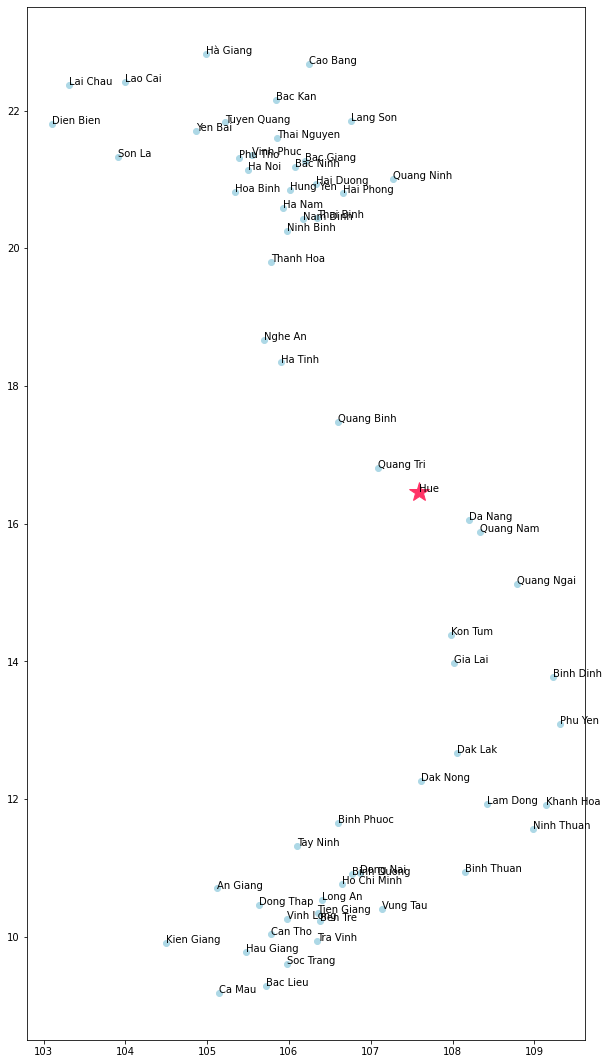

In [58]:
fig = plt.figure()
fig,axes = plt.subplots(figsize = (10,19))
for j in range (1,len(latitude)):
    axes.scatter(longtitude[j], latitude[j], c = 'lightblue')
    axes.text(longtitude[j], latitude[j],province[j])
line, = axes.plot([],[],color = '#FF3366',marker='*',markersize=20)
def animate(i):
    x = long_check[i]
    y = lat_check[i]
    print(x,y)
    line.set_data(x,y)
    return line,

anim = FuncAnimation(fig, animate, frames = len(long_check), interval = 200, blit = True)

anim.save('path.gif', writer = 'pillow')